# Predict Future Sales

Final project for "How to win a Data Science Competition"

* https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data
* https://www.coursera.org/learn/competitive-data-science/home/welcome

In [5]:
# Importació de mòduls

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importació de dades

train_sales = pd.read_csv('train_sales.csv')
train_eval = pd.read_csv('train_eval.csv')

In [3]:
# Conjunts d'entrenament i validació

X_train = train_sales.drop('item_cnt', 1)
y_train = train_sales['item_cnt'].clip(0,20)

X_eval = train_eval.drop('item_cnt', 1)
y_eval = train_eval['item_cnt'].clip(0,20)

del train_sales, train_eval

In [10]:
# Grid Search

parameters = {'n_estimators':[10,20], 'max_depth':[12], 'objective'='reg:squarederror'}
model = XGBRegressor()
search = GridSearchCV(model, parameters, cv=3, return_train_score=False)
search.fit(X_train, y_train)

resultat = pd.DataFrame(search.cv_results_)
resultat.sort_values(by='mean_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,25.836323,0.368074,0.394687,0.018607,12,10,"{'max_depth': 12, 'n_estimators': 10}",0.418616,0.501391,0.388911,0.436306,0.047593,2
0,17.051618,0.738062,0.292006,0.015582,8,10,"{'max_depth': 8, 'n_estimators': 10}",0.442681,0.509893,0.420143,0.457572,0.038123,1


In [7]:
# Entrenament

model = XGBRegressor(n_estimators= 15, max_depth=12, objective='reg:squarederror')
model.fit(X_train, y_train, eval_metric="rmse", eval_set=[(X_train, y_train), (X_eval, y_eval)])

[0]	validation_0-rmse:1.00538	validation_1-rmse:1.07136
[1]	validation_0-rmse:0.952189	validation_1-rmse:1.03413
[2]	validation_0-rmse:0.901466	validation_1-rmse:1.00874
[3]	validation_0-rmse:0.863946	validation_1-rmse:0.985374
[4]	validation_0-rmse:0.824043	validation_1-rmse:0.968659
[5]	validation_0-rmse:0.795454	validation_1-rmse:0.955421
[6]	validation_0-rmse:0.774804	validation_1-rmse:0.944586
[7]	validation_0-rmse:0.75	validation_1-rmse:0.93688
[8]	validation_0-rmse:0.73341	validation_1-rmse:0.930415
[9]	validation_0-rmse:0.716124	validation_1-rmse:0.927981
[10]	validation_0-rmse:0.704926	validation_1-rmse:0.925984
[11]	validation_0-rmse:0.694011	validation_1-rmse:0.923321
[12]	validation_0-rmse:0.685941	validation_1-rmse:0.923029
[13]	validation_0-rmse:0.671622	validation_1-rmse:0.923521
[14]	validation_0-rmse:0.665794	validation_1-rmse:0.923779


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=15,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [6]:
# RMSE del conjunt de validació

y_pred = model.predict(X_eval)
np.sqrt(mean_squared_error(y_pred.clip(0,20), y_eval))

0.9250438851917503

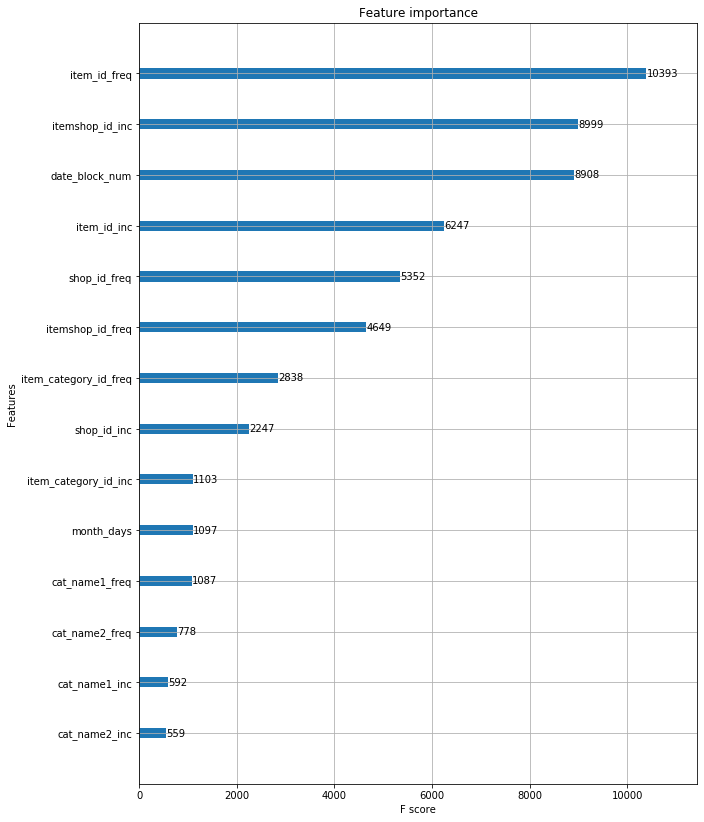

In [15]:
# Importància dels atributs

fig, ax = plt.subplots(1,1,figsize=(10,14))
plot_importance(booster=model, ax=ax)

## Predicció

In [11]:
# Dades

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X = train.drop('item_cnt', 1)
y = train['item_cnt'].clip(0,20)

In [12]:
# Entrenament

model = XGBRegressor(max_depth=12, n_estimators= 25, objective='reg:squarederror')\
                    .fit(X, y, eval_metric="rmse", eval_set=[(X,y)])

[0]	validation_0-rmse:0.998572
[1]	validation_0-rmse:0.937765
[2]	validation_0-rmse:0.880901
[3]	validation_0-rmse:0.835832
[4]	validation_0-rmse:0.792022
[5]	validation_0-rmse:0.75706
[6]	validation_0-rmse:0.729182
[7]	validation_0-rmse:0.697069
[8]	validation_0-rmse:0.674709
[9]	validation_0-rmse:0.65435
[10]	validation_0-rmse:0.638751
[11]	validation_0-rmse:0.622675
[12]	validation_0-rmse:0.609623
[13]	validation_0-rmse:0.591777
[14]	validation_0-rmse:0.581575
[15]	validation_0-rmse:0.572783
[16]	validation_0-rmse:0.561887
[17]	validation_0-rmse:0.55426
[18]	validation_0-rmse:0.546673
[19]	validation_0-rmse:0.539405
[20]	validation_0-rmse:0.533767
[21]	validation_0-rmse:0.528384
[22]	validation_0-rmse:0.523632
[23]	validation_0-rmse:0.518914
[24]	validation_0-rmse:0.514892


In [13]:
# Predicció

y_pred = model.predict(test[X.columns]).clip(0,20)
submission = pd.DataFrame({'ID':test['ID'], 'item_cnt_month': y_pred})
submission.to_csv('submission.csv', index = False)

In [14]:
# RMSE al conjunt d'entrenament

np.sqrt(mean_squared_error(model.predict(train[X.columns]), y))

0.5156962412681523

RMSE al conjunt test (public score): 1.06197